In [5]:
from MRKmeansStep import MRKmeansStep
import matplotlib.pyplot as plt
import numpy as np

In [9]:
def get_jaccard(prot, doc):
        """
        Compute here the Jaccard similarity between  a prototype and a document
        prot should be a list of pairs (word, probability)
        doc should be a list of words
        Words must be alphabeticaly ordered

        The result should be always a value in the range [0,1]
        """

        # As words are alphabeticaly sorted we can sequentially
        # scan the lists only once

        document_list = []
        prototype_list = []

        # Indexes of the scan
        d = 0
        p = 0

        while (d < len(doc) and p < len(prot)):
            # Word in both document and prototype
            if doc[d] == prot[p][0]:
                document_list.append(1)
                prototype_list.append(prot[p][1])
                d += 1
                p += 1
            # Word in the document but not in the prototype
            elif doc[d] < prot[p][0]:
                document_list.append(1)
                prototype_list.append(0)
                d += 1
            # Word in the prototype but not in the document
            elif doc[d] > prot[p][0]:
                document_list.append(0)
                prototype_list.append(prot[p][1])
                p += 1

        # Input the missing part of the scan
        if (p < len(prot)):
            document_list.extend([0 for _ in prot[p:]])
            prototype_list.extend([probability for word, probability in prot[p:]])
        elif (d < len(doc)):
            document_list.extend([1 for _ in doc[d:]])
            prototype_list.extend([0 for _ in doc[d:]])

        document_list = np.array(document_list)
        prototype_list = np.array(prototype_list)

        # Computing the jaccard similarity coefficient
        jaccard_similarity = np.dot(document_list, prototype_list) / (sum(np.square(document_list)) + sum(np.square(prototype_list)) - np.dot(document_list, prototype_list))

        return jaccard_similarity

In [10]:
def read_doc_words(dirname):
    all_docs_words = {}
    docPath = f'{dirname}/documents.txt'
    f = open(docPath)
    #seperate words and sort them and put in the list
    for line in f:
        doc, word_string = line.split(':')
        words = word_string.split()
        # sort words alphabetically                                                                                                                                                                        
        words.sort()
        all_docs_words[doc]=words
    return all_docs_words
    

def get_assignment(assin_path):
    assignments = {}

    with open(assin_path, 'r') as assigment_file:
        lines = assigment_file.readlines()

        for line in lines:
            kmeans_class, documents_string = line.split(':')
            documents_list = documents_string.split(' ')

            # remove the first item in the document list - it is a blank space
            documents_list = documents_list[1:-1]
            assignments[kmeans_class] = documents_list

    return assignments


def calc_docs_clust_sim(proto_path, assin_path, all_doc_words):
    
    assignments = get_assignment(assin_path)

    prototypes = extract_clust_proto(proto_path)
    clust_sim = {}
#find similarity btween words in dictionary and all words
    for prototype_id, prototype in prototypes.items():
        
        assert prototype_id in assignments.keys(), f'{prototype_id} should be in {assignments.keys()}'
        #
        doc_names = assignments[prototype_id]
        print(f'{len(doc_names)} docs have been assigned to {prototype_id} cluster')
        
        cluster_sim = 0
        for doc_name in doc_names:
            words = all_doc_words[doc_name]
            cluster_sim += get_jaccard(prototype, words)
        clust_sim[prototype_id] = np.mean(np.array(cluster_sim))
    
    return clust_sim  

#create a dictionary for different clusters and add their words as a value to that
def extract_clust_proto(proto_path):
    prototypes={}
    f = open(proto_path, 'r')
    for line in f:
        cluster, words = line.split(':')
        cp = []
        for word in words.split():
            cp.append((word.split('+')[0], float(word.split('+')[1])))
            # sort the cps                                                                                                                                                             
        cp.sort()
        prototypes[cluster] = cp

    return prototypes


### Considering 8,10 and 15 clusters and minfreq= 0.05 and maxfreq = 0.15 and 250 words

In [11]:
dirname='./minfreq:0.05_maxfreq:0.15_numwords:250_ncores:8'
proto_path = f'{dirname}/local_data/prototypes24.txt'
assin_path = f'{dirname}/local_data/assignments23.txt'
all_doc_words = read_doc_words(dirname)
clust_sim_8= calc_docs_clust_sim(proto_path, assin_path, all_doc_words)


3228 docs have been assigned to CLASS0 cluster
5171 docs have been assigned to CLASS1 cluster
4960 docs have been assigned to CLASS6 cluster
7958 docs have been assigned to CLASS7 cluster
11908 docs have been assigned to CLASS4 cluster
4704 docs have been assigned to CLASS5 cluster
11980 docs have been assigned to CLASS2 cluster
5843 docs have been assigned to CLASS3 cluster


In [12]:
dirname='./minfreq:0.05_maxfreq:0.15_numwords:250_ncores:10'
proto_path = f'{dirname}/local_data/prototypes24.txt'
assin_path = f'{dirname}/local_data/assignments23.txt'
all_doc_words = read_doc_words(dirname)
clust_sim_10= calc_docs_clust_sim(proto_path, assin_path, all_doc_words)


5683 docs have been assigned to CLASS0 cluster
2863 docs have been assigned to CLASS6 cluster
4961 docs have been assigned to CLASS7 cluster
3522 docs have been assigned to CLASS8 cluster
5303 docs have been assigned to CLASS9 cluster
2699 docs have been assigned to CLASS3 cluster
11125 docs have been assigned to CLASS4 cluster
4745 docs have been assigned to CLASS5 cluster
3526 docs have been assigned to CLASS1 cluster
11323 docs have been assigned to CLASS2 cluster


In [13]:
dirname='./minfreq:0.05_maxfreq:0.15_numwords:250_ncores:15'
proto_path = f'{dirname}/local_data/prototypes24.txt'
assin_path = f'{dirname}/local_data/assignments23.txt'
all_doc_words = read_doc_words(dirname)
clust_sim_15= calc_docs_clust_sim(proto_path, assin_path, all_doc_words)


2485 docs have been assigned to CLASS0 cluster
3001 docs have been assigned to CLASS1 cluster
2237 docs have been assigned to CLASS4 cluster
2785 docs have been assigned to CLASS5 cluster
4320 docs have been assigned to CLASS6 cluster
2287 docs have been assigned to CLASS7 cluster
3264 docs have been assigned to CLASS8 cluster
2282 docs have been assigned to CLASS13 cluster
9735 docs have been assigned to CLASS14 cluster
1740 docs have been assigned to CLASS2 cluster
3879 docs have been assigned to CLASS3 cluster
1814 docs have been assigned to CLASS9 cluster
9553 docs have been assigned to CLASS10 cluster
3232 docs have been assigned to CLASS11 cluster
3131 docs have been assigned to CLASS12 cluster


### Compare their perfomance

num of cluster :8, mean:964.037, mean:474.558852
num of cluster :10, mean:796.463, mean:460.865398
num of cluster :15, mean:559.623, mean:396.736680


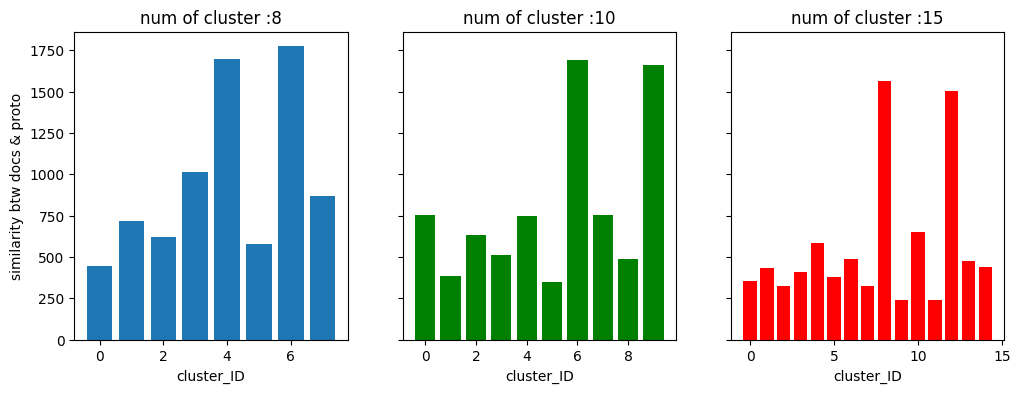

In [14]:
fig, axis = plt.subplots(1,3,sharex=False, sharey=True ,figsize=(12, 4))

cluster_id_8 = np.arange(len(clust_sim_8))
axis[0].bar(cluster_id_8, clust_sim_8.values())
vals_8 = np.array(list(clust_sim_8.values()))
axis[0].set_title(f'num of cluster :{len(clust_sim_8)}')
axis[0].set(ylabel='similarity btw docs & proto')

cluster_id_10 = np.arange(len(clust_sim_10))
axis[1].bar(cluster_id_10, clust_sim_10.values(),color = 'green')
vals_10 = np.array(list(clust_sim_10.values()))
axis[1].set_title(f'num of cluster :{len(clust_sim_10)}')

cluster_id_10 = np.arange(len(clust_sim_15))
axis[2].bar(cluster_id_10, clust_sim_15.values(),color = 'red')
vals_15 = np.array(list(clust_sim_15.values()))
axis[2].set_title(f'num of cluster :{len(clust_sim_15)}')

for ax in axis.flat:
    ax.set(xlabel='cluster_ID')


print(f'num of cluster :{len(clust_sim_8)}, mean:{np.mean(vals_8):.3f}, mean:{np.std(vals_8):2f}')
print(f'num of cluster :{len(clust_sim_10)}, mean:{np.mean(vals_10):.3f}, mean:{np.std(vals_10):2f}')
print(f'num of cluster :{len(clust_sim_15)}, mean:{np.mean(vals_15):.3f}, mean:{np.std(vals_15):2f}')



### Considering 8,10 and 15 clusters and minfreq= 0.05 and maxfreq = 0.15 and 100 words

In [15]:
dirname='./minfreq:0.05_maxfreq:0.15_numwords:100_ncores:8'
proto_path = f'{dirname}/local_data/prototypes24.txt'
assin_path = f'{dirname}/local_data/assignments23.txt'
all_doc_words = read_doc_words(dirname)
clust_sim_8_100= calc_docs_clust_sim(proto_path, assin_path, all_doc_words)


8464 docs have been assigned to CLASS0 cluster
5145 docs have been assigned to CLASS5 cluster
6040 docs have been assigned to CLASS6 cluster
4827 docs have been assigned to CLASS7 cluster
13500 docs have been assigned to CLASS3 cluster
5953 docs have been assigned to CLASS4 cluster
4848 docs have been assigned to CLASS1 cluster
6975 docs have been assigned to CLASS2 cluster


In [16]:
dirname='./minfreq:0.05_maxfreq:0.15_numwords:100_ncores:10'
proto_path = f'{dirname}/local_data/prototypes24.txt'
assin_path = f'{dirname}/local_data/assignments23.txt'
all_doc_words = read_doc_words(dirname)
clust_sim_10_100= calc_docs_clust_sim(proto_path, assin_path, all_doc_words)


10641 docs have been assigned to CLASS0 cluster
5374 docs have been assigned to CLASS5 cluster
4324 docs have been assigned to CLASS6 cluster
8687 docs have been assigned to CLASS7 cluster
4265 docs have been assigned to CLASS3 cluster
5109 docs have been assigned to CLASS4 cluster
3886 docs have been assigned to CLASS8 cluster
4206 docs have been assigned to CLASS9 cluster
4667 docs have been assigned to CLASS1 cluster
4591 docs have been assigned to CLASS2 cluster


In [17]:
dirname='./minfreq:0.05_maxfreq:0.15_numwords:100_ncores:15'
proto_path = f'{dirname}/local_data/prototypes24.txt'
assin_path = f'{dirname}/local_data/assignments23.txt'
all_doc_words = read_doc_words(dirname)
clust_sim_15_100= calc_docs_clust_sim(proto_path, assin_path, all_doc_words)


2623 docs have been assigned to CLASS0 cluster
1958 docs have been assigned to CLASS1 cluster
6700 docs have been assigned to CLASS5 cluster
3130 docs have been assigned to CLASS6 cluster
2109 docs have been assigned to CLASS7 cluster
3057 docs have been assigned to CLASS8 cluster
2275 docs have been assigned to CLASS9 cluster
2696 docs have been assigned to CLASS14 cluster
4803 docs have been assigned to CLASS2 cluster
3770 docs have been assigned to CLASS3 cluster
4246 docs have been assigned to CLASS4 cluster
2762 docs have been assigned to CLASS10 cluster
4123 docs have been assigned to CLASS11 cluster
3179 docs have been assigned to CLASS12 cluster
8314 docs have been assigned to CLASS13 cluster


num of cluster :8, mean:1217.747, mean:493.277824
num of cluster :10, mean:1022.392, mean:411.404824
num of cluster :15, mean:739.356, mean:379.831107


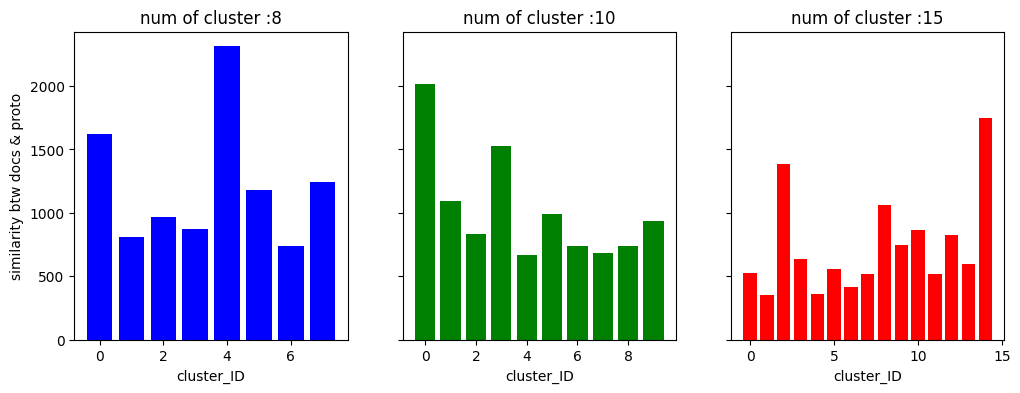

In [18]:
fig, axis = plt.subplots(1,3,sharex=False, sharey=True ,figsize=(12, 4))

cluster_id = np.arange(len(clust_sim_8_100))
axis[0].bar(cluster_id, clust_sim_8_100.values(),color ="blue")
vals_8_100 = np.array(list(clust_sim_8_100.values()))
axis[0].set_title(f'num of cluster :{len(clust_sim_8_100)}')

cluster_id = np.arange(len(clust_sim_10_100))
axis[1].bar(cluster_id, clust_sim_10_100.values(),color ="green")
vals_10_100 = np.array(list(clust_sim_10_100.values()))
axis[1].set_title(f'num of cluster :{len(clust_sim_10_100)}')

cluster_id = np.arange(len(clust_sim_15_100))
axis[2].bar(cluster_id, clust_sim_15_100.values(),color ='red')
vals_15_100 = np.array(list(clust_sim_15_100.values()))
axis[2].set_title(f'num of cluster :{len(clust_sim_15_100)}')
axis[0].set(ylabel='similarity btw docs & proto')

for ax in axis.flat:
    ax.set(xlabel='cluster_ID')
print(f'num of cluster :{len(clust_sim_8_100)}, mean:{np.mean(vals_8_100):.3f}, mean:{np.std(vals_8_100):2f}')
print(f'num of cluster :{len(clust_sim_10_100)}, mean:{np.mean(vals_10_100):.3f}, mean:{np.std(vals_10_100):2f}')
print(f'num of cluster :{len(clust_sim_15_100)}, mean:{np.mean(vals_15_100):.3f}, mean:{np.std(vals_15_100):2f}')
